# CS112: Assignment 2
## Regression and Bootstrapping
## Question 1: Obtain the “Grade 4 Electric Company” data that we used in class

In [1]:
sesame <- read.csv("https://tinyurl.com/wlgl63b")

In [2]:
head(sesame)

post.test,pre.test,treatment
116.2,105.9,1
116.9,100.8,1
106.9,91.7,1
104.6,97.5,1
114.2,106.5,1
113.6,107.4,1


In [3]:
names(sesame)

[1] "post.test" "pre.test"  "treatment"

### (A)Replicate the “Grade 4” data visualization (the right-panel) in Figure 9.7 of the Gelman reading. Be sure to label everything appropriately.

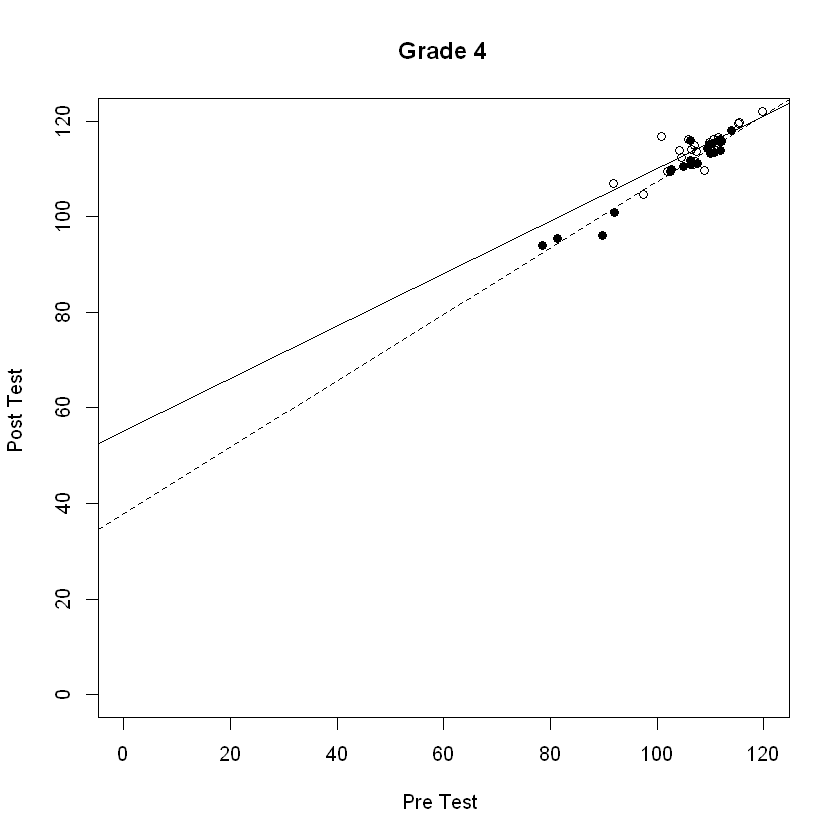

In [4]:
# Plotting the Graph using the original data
attach(sesame)

# Doing the above step so that the same graph can be generated again
#Once the value is changed in the next part of the question
sesame$post.test[11] = 113.9

#Splitting the data set w.r.t treatment value
split_df <- split(sesame, with(sesame, interaction(treatment)), drop = TRUE)
zero_treatment <- split_df$'0'
one_treatment <- split_df$'1'

#Plotting the graph
plot(pre.test, post.test, main = "Grade 4",
     xlim = c(0,120), ylim = c(0, 120), pch=ifelse(sesame$treatment==1, 1, 16),
     xlab = "Pre Test ", ylab = "Post Test ",
     abline(lm(zero_treatment$post.test ~ zero_treatment$pre.test),lty = 2))
lines(abline(lm(one_treatment$post.test ~ one_treatment$pre.test),lty = 1))

### (B) The treatment effects in this “Grade 4” data visualization are positive for all (or nearly all--it’s a little hard to tell) X-values shown in the figure. Change the y-value of one data point (in any way you wish) such that the treatment effects are negative for all X values shown in the figure. (Ideally, you would change the y-value just a little, because that would demonstrate the vulnerability of the positive treatment effects to the presence of high-leverage outliers--but ANY change in the given observation is fine.) Create a new figure showing the new (negative) treatment effects AND BE SURE TO MAKE THE POINT YOU MODIFIED A DIFFERENT COLOR FROM ALL THE OTHER POINTS.

The following objects are masked from sesame (pos = 3):

    post.test, pre.test, treatment



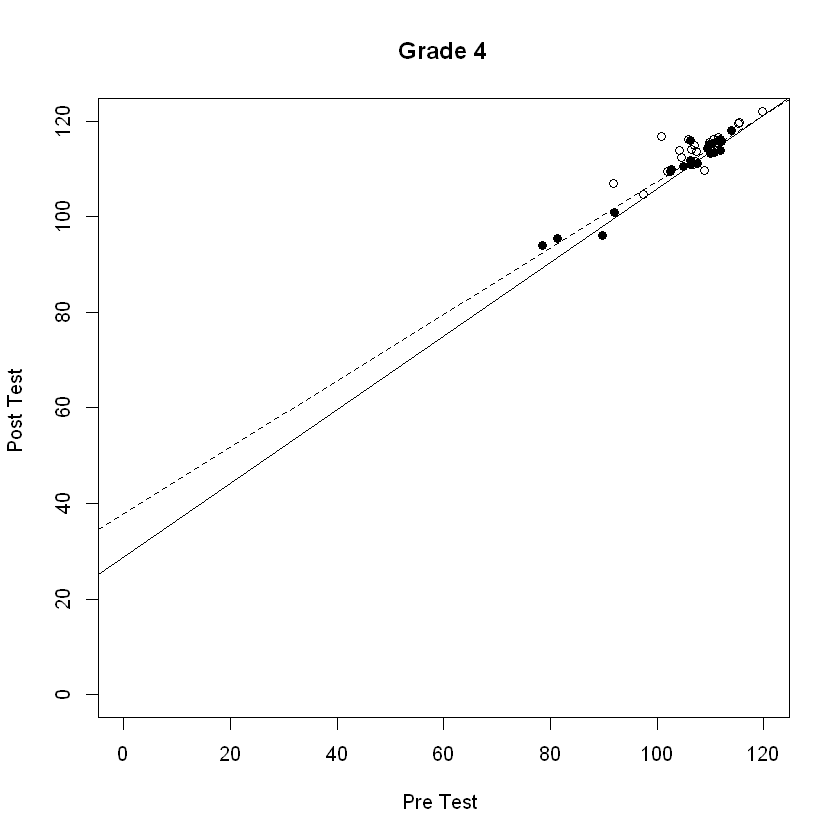

In [5]:
attach(sesame)

#Changing the value of a certain point
sesame[11,'post.test'] = 60

#Splitting the data set w.r.t treatment value
split_df <- split(sesame, with(sesame, interaction(treatment)), drop = TRUE)
zero_treatment <- split_df$'0'
one_treatment <- split_df$'1'


#Plotting the graph
plot(pre.test, post.test, main = "Grade 4",
     xlim = c(0,120), ylim = c(0, 120), col = ifelse(post.test == 50, "red", "black"),
     pch=ifelse(sesame$treatment==1, 1, 16),
     xlab = "Pre Test ", ylab = "Post Test ",
     abline(lm(zero_treatment$post.test ~ zero_treatment$pre.test),lty = 2))
lines(abline(lm(one_treatment$post.test ~ one_treatment$pre.test),lty = 1))

### (C) Replicate Figure 9.8, again labelling everything appropriately. Do you notice how the uncertainty of the treatment effect estimates is larger at the sides of the figure than it is in the middle? Write a sentence or two discussing and explaining why the uncertainty of the treatment effect is minimized in the region where it appears smallest (i.e., with respect to the X-axis). For extra credit, modify your data visualization to identify (with some color) the 95% interval of the expected value of the treatment effect for all values of X shown in the figure. This requires obtaining simulated expected values for the treatment effect (conditional on pre.test) and then identifying the mid-95% range of those values -- for many discrete values of pre.test.

In [6]:
sesame <- read.csv("https://tinyurl.com/wlgl63b")

Warning message:
"package 'arm' was built under R version 3.6.2"Loading required package: Matrix
Loading required package: lme4
Warning message:
"package 'lme4' was built under R version 3.6.2"
arm (Version 1.10-1, built: 2018-4-12)

Working directory is C:/Users/usama/Desktop/CS112 Assignment 2



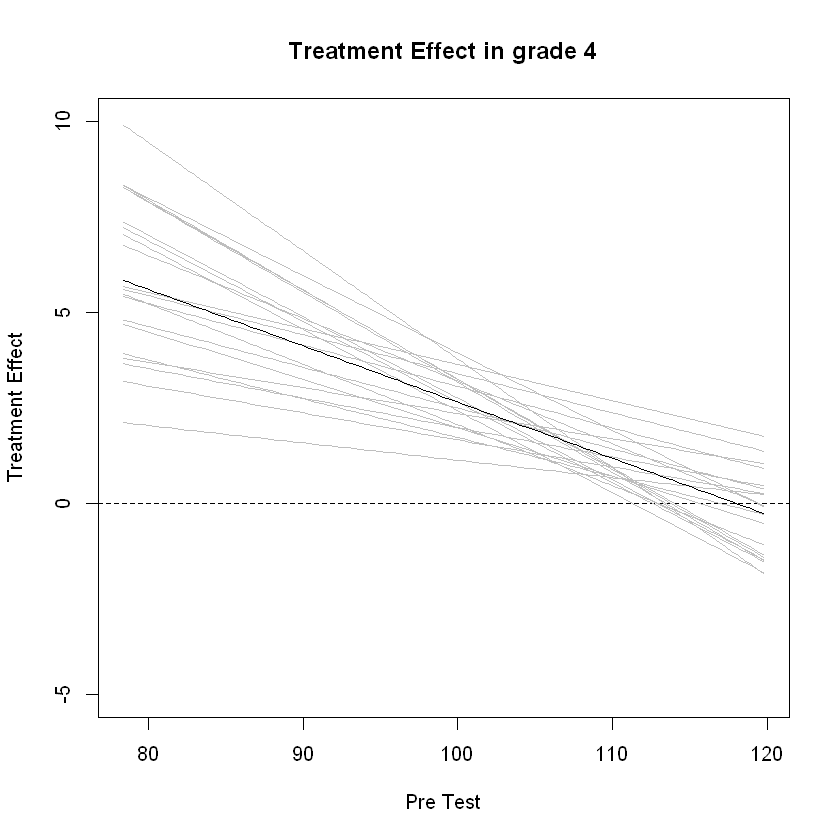

In [7]:
library(MASS)
library(arm)

#fit the regression model
lm_4 <- lm(sesame$post.test ~ sesame$treatment + sesame$pre.test + sesame$treatment:sesame$pre.test)
lm_4.sim <- sim(lm_4)

#PLotting the graph
plot (0, 0, xlim = range(sesame$pre.test), ylim=c(-5,10),
      xlab="Pre Test", ylab="Treatment Effect",
      main="Treatment Effect in grade 4")
abline (0, 0, lwd=.5, lty=2)

for (i in 1:20){
    curve(coef(lm_4.sim)[i,2] + coef(lm_4.sim)[i,4]*x , lwd=.5, col="gray",add=TRUE)
}

curve(coef(lm_4)[2] + coef(lm_4)[4]*x, lwd=.5, add=TRUE)

### Explanation

As seen in the data most of the observations lie between 100-120. Because of this, most of the simulated regression lines are pointing towards this region, which can be seen in the above figure too. This also shows that the uncertainity around the treatment effect is the lowest in tbis region.

## Question 2 : Obtain the “tinting” data set


In [8]:
tinting <- read.csv(url("https://tinyurl.com/v4bq99k"))
head(tinting)

case,id,age,sex,tint,target,it,csoa,agegp
1,1,22.4,f,no,hicon,26.00,46.80,younger
1,1,22.4,f,lo,hicon,32.24,37.44,younger
1,1,22.4,f,hi,hicon,27.04,42.64,younger
1,1,22.4,f,no,locon,17.68,41.60,younger
1,1,22.4,f,lo,locon,20.80,37.44,younger
1,1,22.4,f,hi,locon,26.00,40.56,younger


In [9]:
names(tinting)

[1] "case"   "id"     "age"    "sex"    "tint"   "target" "it"     "csoa"  
[9] "agegp"

In [10]:
library(arm)

# Fitting the regression model 
lm1 <- lm(csoa ~ age + sex + target + I(as.numeric(tinting$tint != "no"))
          + I(as.numeric(tint!= "no")*age), data = tinting) 
summary(lm1)

# Simulations 
iterations <- 1000
tinting_sim <- sim(lm1, n.sims = iterations)

# Predict csoa for every value of age
age_seq = seq(20,80, by = 10)
treat_simulation <- matrix(NA, nrow = iterations, length(age_seq))

for (age in age_seq) {
  xs <- c(1, age, 0, 1, 1, 1*age)   
  for (i in 1:iterations) {
    treat_simulation[i, 1 + (age-min(age_seq))/10] <- sum(xs*tinting_sim@coef[i,]) 
  }
}

#Creating the table with all the upper and lower bounds
CI_mean.treat <- apply(treat_simulation, 2, quantile, probs = c(0.025, 0.975))
csoa_mean <- apply(treat_simulation, 2, mean)
table1 <- t(data.frame(CI_mean.treat))
colnames(table1) <- c("CSOA Lower Bound", "CSOA Upper Bound")
table1 <- data.frame(table1, csoa_mean)
rownames(table1) <- age_seq
table1


Call:
lm(formula = csoa ~ age + sex + target + I(as.numeric(tinting$tint != 
    "no")) + I(as.numeric(tint != "no") * age), data = tinting)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.268 -10.518  -1.896   7.244  63.495 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         31.15440    3.43576   9.068 2.35e-16 ***
age                                  0.28633    0.06355   4.506 1.20e-05 ***
sexm                                 5.48114    2.18666   2.507   0.0131 *  
targetlocon                          3.53675    2.05229   1.723   0.0866 .  
I(as.numeric(tinting$tint != "no")) -0.72172    4.45631  -0.162   0.8715    
I(as.numeric(tint != "no") * age)    0.04237    0.08081   0.524   0.6007    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 13.51 on 176 degrees of freedom
Multiple R-squared:  0.3359,	Adjusted R-squared:  0.317 
F-statistic:  17.8 on 5 and 

,CSOA.Lower.Bound,CSOA.Upper.Bound,csoa_mean
20,36.10237,45.06444,40.53302
30,39.80325,47.79488,43.80851
40,43.12923,50.82072,47.08400
50,46.24071,54.04517,50.35949
60,49.13702,57.78575,53.63497
70,51.87652,61.52489,56.91046
80,54.25499,65.33166,60.18595


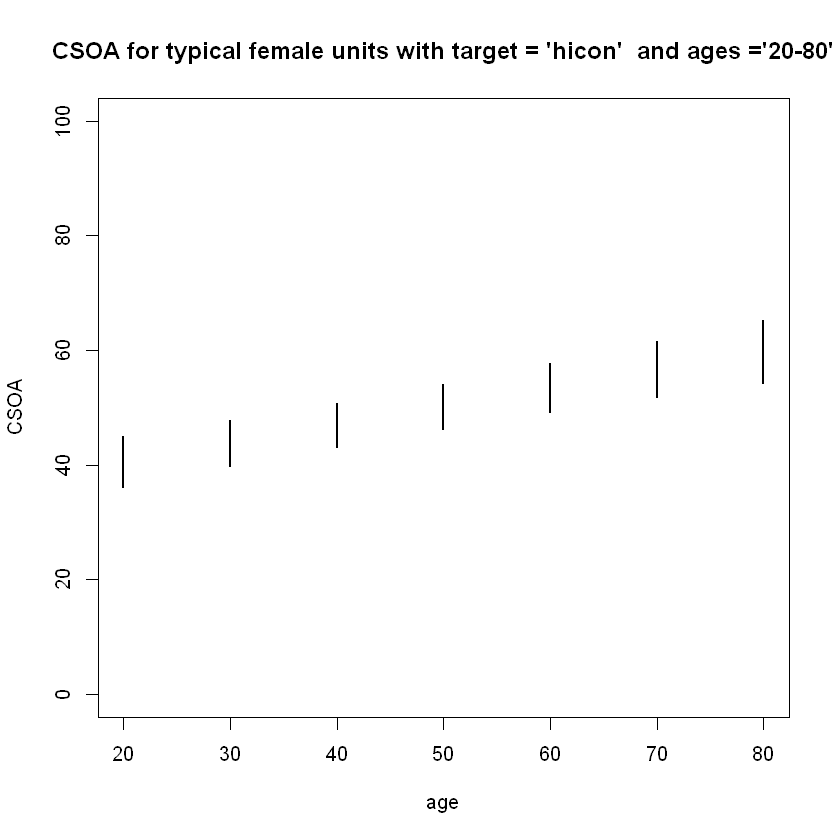

In [11]:
# Plotting the predicted csoa
plot(x = c(1:100), y = c(1:100), type = "n", 
     xlim = c(20,80), 
     ylim = c(0,100), 
     main = "CSOA for typical female units with target = 'hicon'  and ages ='20-80'", xlab = "age", 
     ylab = "CSOA")

for (age in age_seq) {
  segments(
    x0 = age,
    y0 = CI_mean.treat[1,((age-min(age_seq))/10) + 1],
    x1 = age,
    y1 = CI_mean.treat[2, ((age-min(age_seq))/10) + 1],
    lwd = 2)
}

In [12]:
# Predicting csoa for every value of age
age_seq = seq(20,80, by = 10)
control_simulation <- matrix(NA, nrow = iterations, ncol = length(age_seq))

for (age in age_seq) {
  xs <- c(1, age, 0, 1, 1, 0*age) 
    
  for (i in 1:iterations) {
    control_simulation[i, 1 + (age-min(age_seq))/10] <- sum(xs*tinting_sim@coef[i,])
  }
}

simulated_treatment_effect = treat_simulation - control_simulation

#Creating the table with all the upper and lower bounds
CI_treatment_effect <- apply(simulated_treatment_effect, 2, quantile, probs = c(0.025, 0.975))
mean_treatment_effect <- apply(simulated_treatment_effect, 2, mean)
table2 <- t(data.frame(CI_treatment_effect))
colnames(table2) <- c("Treatment Effect Lower Bound", "Treatment Effect Upper Bound")
rownames(table2) <- age_seq
table2

,Treatment Effect Lower Bound,Treatment Effect Upper Bound
20,-2.336574,3.957894
30,-3.504862,5.936842
40,-4.673149,7.915789
50,-5.841436,9.894736
60,-7.009723,11.873683
70,-8.178011,13.852631
80,-9.346298,15.831578


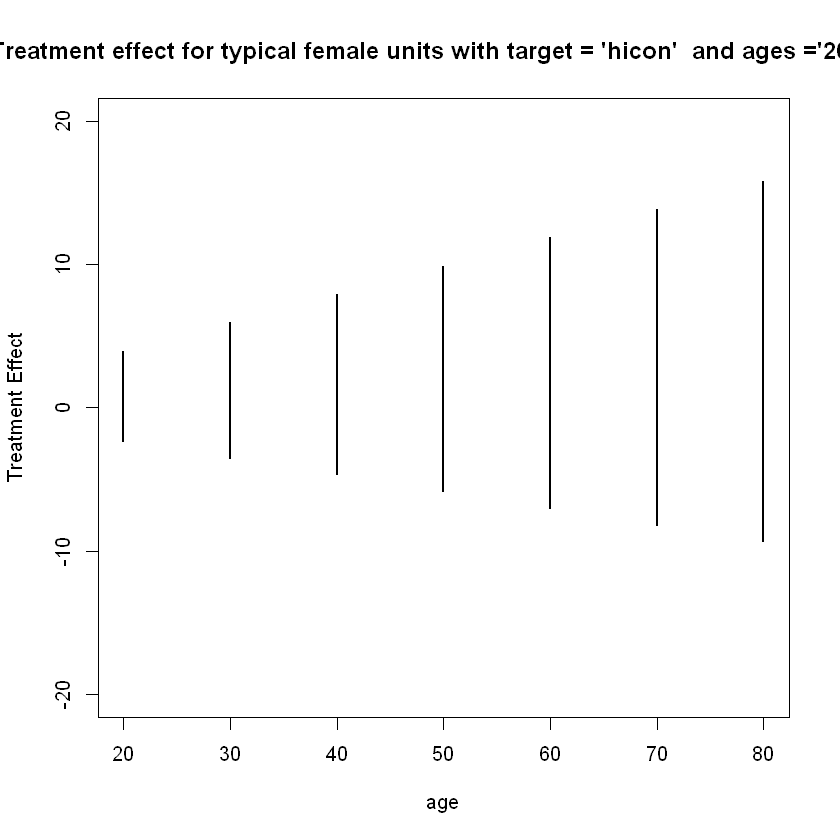

In [13]:
# Plot the predicted csoa
plot(x = c(1:100), y = c(1:100), type = "n", 
     xlim = c(20,80), ylim = c(-20,20),
     main = "Treatment effect for typical female units with target = 'hicon'  and ages ='20-80' ", xlab = "age", 
     ylab = "Treatment Effect")

for (age in age_seq) {
  segments(
    x0 = age,y0 = CI_treatment_effect[1, ((age-min(age_seq))/10)+1],
    x1 = age,y1 = CI_treatment_effect[2, ((age-min(age_seq))/10)+1],
    lwd = 2)
}

## Question 3
### Write your own function (8 lines max) that takes Ys and predicted Ys as inputs, anoutputs R2. Copy/paste an example using the lalonde data (from the Matching library) that shows your code is working correctly -- (i.e., show that the summary(lm()) command outputs a very similar R2 as your own function does.

In [14]:
library(Matching)
data(lalonde)
head(lalonde)

Warning message:
"package 'Matching' was built under R version 3.6.2"## 
##  Matching (Version 4.9-6, Build Date: 2019-04-07)
##  See http://sekhon.berkeley.edu/matching for additional documentation.
##  Please cite software as:
##   Jasjeet S. Sekhon. 2011. ``Multivariate and Propensity Score Matching
##   Software with Automated Balance Optimization: The Matching package for R.''
##   Journal of Statistical Software, 42(7): 1-52. 
##



age,educ,black,hisp,married,nodegr,re74,re75,re78,u74,u75,treat
37,11,1,0,1,1,0,0,9930.05,1,1,1
22,9,0,1,0,1,0,0,3595.89,1,1,1
30,12,1,0,0,0,0,0,24909.50,1,1,1
27,11,1,0,0,1,0,0,7506.15,1,1,1
33,8,1,0,0,1,0,0,289.79,1,1,1
22,9,1,0,0,1,0,0,4056.49,1,1,1


In [ ]:
library(Matching)
data(lalonde)
attach(lalonde)

lm_1 <- summary(lm(re78 ~ age, data = lalonde))
lm_1

#Creating a function to find R^2
r_sqrd <-  function (a,b) {
    r_ss <- sum((a-b) ^ 2)
    t_ss <- sum((a-mean(b)) ^ 2)
    return (1- r_ss/t_ss)
}

# Taking the value of y intercept and the slope to calculate the prediction
predict_y <- 53.39 * age + 3946.18

summary(lm(re78 ~ predict_y))
#0.003268

r_sqrd(re78, predict_y)
#0.0032679133994632


## Question 4

In [15]:
library(foreign)
maze_data = read.dta('mazedata1.dta')
head(maze_data)

year,month,day,studentid,groupna,treatment,caste,round1,round2,class,...,math3,math4,hindi1,hindi2,hindi3,mothedu,fathedu,mothocc,fathocc,land
2003,January,first day,1,42,Caste Revealed,kshatriya,4,8,7,...,NA,NA,NA,NA,NA,5,10,housewife,field,3.00000
2003,January,first day,2,42,Caste Revealed,chamar,4,4,6,...,NA,NA,NA,NA,NA,0,0,housewife,field,0.79781
2003,January,first day,3,42,Caste Revealed,kshatriya,1,1,6,...,NA,NA,NA,NA,NA,10,8,housewife,field,1.60000
2003,January,first day,4,42,Caste Revealed,kshatriya,3,3,6,...,NA,NA,NA,NA,NA,0,8,housewife,field,1.83027
2003,January,first day,5,42,Caste Revealed,chamar,5,8,7,...,NA,NA,NA,NA,NA,0,0,housewife,field+ construction,0.00000
2003,January,first day,6,42,Caste Revealed,chamar,0,0,6,...,NA,NA,NA,NA,NA,6,10,housewife,field,0.00000


In [16]:
library(foreign)
treatment_group = subset(maze_data, maze_data$treatment == 'Caste Revealed')
control_group = subset(maze_data, maze_data$treatment != 'Caste Revealed')

collector = c()

# Bootstrapping Model
for(i in 1:10000){
    treatment_dependent <- maze_data$round1[sample(length(treatment_group),length(treatment_group),replace = TRUE)]
    treatment_mean <- mean(treatment_dependent, na.rm = TRUE)

    control_dependent <- maze_data$round1[sample(length(control_group), length(control_group), replace = TRUE)]
    control_mean <- mean(control_dependent, na.rm = TRUE)
    collector[i] <- treatment_mean - control_mean
}

#Setting value for a 95% CI
CI = quantile(collector, probs = c(0.025, 0.975))

#regression model
reg = lm(round1~treatment, data=maze_data)
intervals = confint(reg, level = 0.95)[2,]

#Producing a table
table = data.frame('Bootstrap intervals'= CI, 'Regression intervals'= intervals)
table

,Bootstrap.intervals,Regression.intervals
2.5%,-0.8846154,-0.2893112
97.5%,0.8846154,0.6752087


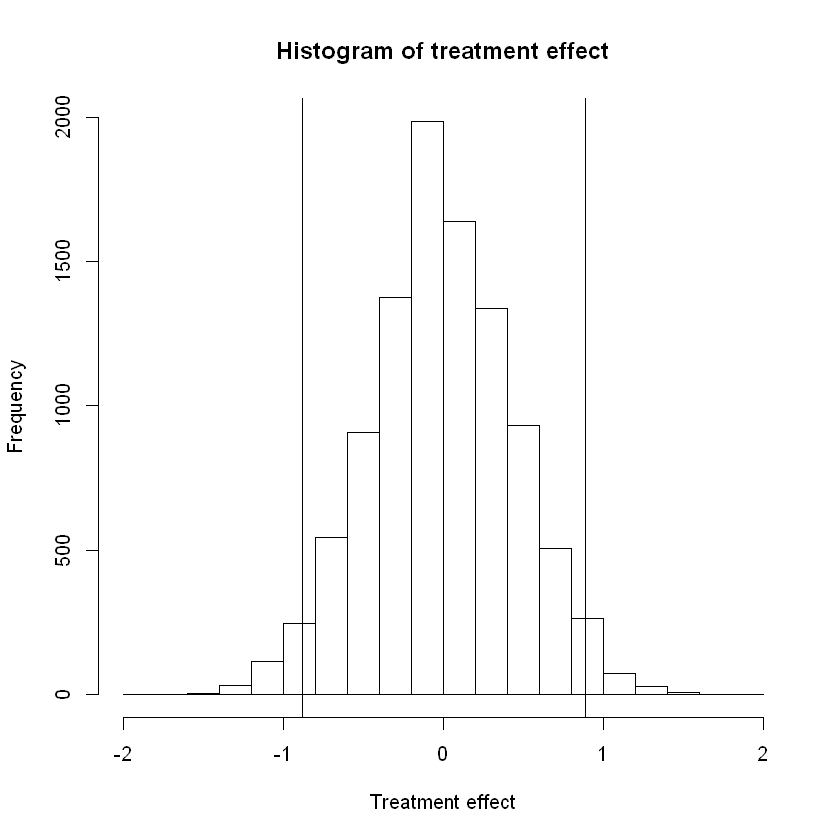

In [17]:
#histogram
hist(collector, main="Histogram of treatment effect", xlab= "Treatment effect")
abline(v = quantile(collector, probs = c(0.025, 0.975)))

### Explanation

Coefficient of the treatment variable in the linear model indicates the treatment effect, ~ -0.132. The 95% confidence interval ranges from ~ -0.584 to ~ 0.319, which means we lack strong evidence about the direction of the treatment effect. Analytical and simulation approaches yielded similar CIs, which provided extra confidence in this conclusion. 

## Question 5

In [18]:
foo <- read.csv(url("https://tinyurl.com/yx8tqf3k"))
head(foo)

treat,age,education,black,hispanic,married,nodegree,re74,re75,re78,u74,u75
1,37,11,1,0,1,1,0,0,9930.0459,TRUE,TRUE
1,22,9,0,1,0,1,0,0,3595.8940,TRUE,TRUE
1,30,12,1,0,0,0,0,0,24909.4492,TRUE,TRUE
1,27,11,1,0,0,1,0,0,7506.1460,TRUE,TRUE
1,33,8,1,0,0,1,0,0,289.7899,TRUE,TRUE
1,22,9,1,0,0,1,0,0,4056.4939,TRUE,TRUE


In [19]:
set.seed(20181001)
test_set_rows <- sample(1:length(foo$age), 2000, replace =FALSE)
training = foo[-test_set_rows,]
test = foo[test_set_rows,]

### Use the remainder of the dataset to estimate 2 models of varying degrees of complexity, with the dependent variable being “treat”. The model specification is indicated by the table below (e.g. Prof. Diamond will build models in the A-F column). NOTE: re78 is not a predictor because it postdates the treatment. In other words, it’s an outcome.

In [ ]:
set.seed(20181001)
library(boot)

# Train your model on ALL the data -- Use glm instead of lm
glm.training <- glm(treat ~ education, data = training)
glm2.training <- glm(treat ~ .*. - re74 + age*education, data = training)


# Using the K argument to perform K-fold CV
simplecv.err2 <- cv.glm(training, glm.training , K = 10)
complexcv.err2 <- cv.glm(training, glm2.training, K = 10)


# cv.glm performs LOOCV 
simple.err <- cv.glm(training, glm.training)
complex.err <- cv.glm(training, glm2.training)


# This is the MSE of LOOCV
simple.err$delta[1]
#0.0113200377036034

complex.err$delta[1]
#0.0078608992503143


# This is the MSE of K-fold CV
simplecv.err2$delta[1]
#0.0113210975276511

complexcv.err2$delta[1] 
#0.00784698892261531

In [ ]:
# test MSE from the models
test.simple = mean((test$treat - predict.lm(glm.training,test))**2)
test.complex = mean((test$treat - predict.lm(glm2.training,test))**2)

loocv = c(simple.err$delta[1], complex.err$delta[1])
cv = c(simplecv.err2$delta[1], complexcv.err2$delta[1])
test = c(test.simple, test.complex)
summary = data.frame('ten_fold CV' = cv, 'LOOCV' = cv, 'Test_set error' = test)
row.names(summary) = c('Simple_model', 'Complex_model')
summary

In the above table we can see that, LOOCV slightely overapproximated the MSE in both cases but it is still a very good approximation of the MSE (~0.002 difference). This may be good in practice, as it doesn't give the wrong impression that the model is better than it actually is. The trade-off of using LOOCV is that it is very computationally expensive as it takes a lot of time (about 18 minutes) and memory to run. Moreover, the complex model gives a better MSE and LOOCV value as it might be overfitting the data because of so many independent variables.

## Question 6
### Write the executive summary for a decision brief about the impact of an alcohol-awareness program targeted at individuals age 18-30, intended to reduce binge drinking

### Purpose
Here we are going to discuss the results from the Anti Alcohol consumption (AAC) experiment that took place in 17 different states across the US. The main purpose of this experiment was to reduce the rate of alcohol consumption among young adults aged between 18-30 years of age (shown in figure below).


### The Methodology
Almost 300 participants were randomly selected from different community colleges across these states and were assigned to either a climate change course or an AAC course. The people taking part in climate change course were the control group whereas the one's taking AAC were in the treatment group. Both the groups reported their weekly alcohol consumption along with some random extra information (for the blinding of the experiment). 

### Results
The results show that before the experiment, weekly alcohol consumption was mostly similar across all the ages while there was a significant reduction in this consumption after the experiment. This experiment had most effect on the 18 years olds as the consumption was significantly lower for them (as shown in the figure), and relatively lower for ages 22-26. Consumption of treatment group was rougly same for all ages while among control group it decreased with age increase such that the difference around ages 28-30 was very little. Since the sample sizes were large, the large intervals are associated with the variability of consumption rather than being uncertainty of estimators. 


### Implication
Thus, the results support administering the program to adults aged 18-20, and with secondary priority to provide it to adults aged 22-26. The course's efficiency seems lower for older participants.



In [ ]:
trt = matrix(NA,nrow=2,ncol=7)
ctrl = matrix(NA,nrow=2,ncol=7) 

trt[,1]=c(0, 2) #18
ctrl[,1]=c(3, 10)
trt[,2]=c(0, 3) #20
ctrl[,2]=c(2, 8)
trt[,3]=c(0, 4) #22
ctrl[,3]=c(2, 7)
trt[,4]=c(1, 3) #24
ctrl[,4]=c(2, 6)
trt[,5]=c(1, 3) #26
ctrl[,5]=c(2, 5)
trt[,6]=c(1, 3) #28
ctrl[,6]=c(2, 4)
trt[,7]=c(1, 2) #30
ctrl[,7]=c(1, 3)


c1 = rgb(red = 1, green = 0, blue = 0, alpha = 0.5) #trt
c2 = rgb(red = 0, green = 0, blue = 1, alpha = 0.5) #ctrl

plot(x = c(1:100), y = c(1:100), type = "n", xlim = c(17,31), ylim = c(0,11), cex.lab=1.2,
     main = "Alcohol Consumption - 95% Prediction Intervals", xlab = "Age",ylab = "Drinks per Week")

for (age in seq(from=18,to=30,by=2)) { 
  segments(x0 = age-0.05, y0 = trt[1, (age-18)/2+1],
           x1 = age-0.05, y1 = trt[2, (age-18)/2+1],lwd = 3,col=c1)
  
  segments(x0 = age+0.05, y0 = ctrl[1, (age-18)/2+1],
           x1 = age+0.05, y1 = ctrl[2, (age-18)/2+1],lwd = 3,col=c2)
}
legend('topright',legend=c('Treatment','Control'),fill=c(c1,c2))
mtext("https://tinyurl.com/vwxuwop", side = 1, cex = 0.5, adj = 0, padj = 10)